In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [ ]:
path = ('/content/titanic.csv')
data = pd.read_csv(path)
print("Shape : ", data.shape)
print("Is there any null values ? " ,data.isnull().values.any())
data.head()

Shape :  (891, 12)
Is there any null values ?  True


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data = data.dropna()
print("Is there any null values ? " ,data.isnull().values.any())
data.head()

Is there any null values ?  False


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Text(0.5, 1.0, 'Survived by age')

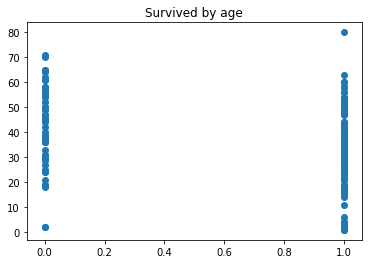

In [ ]:
plt.scatter(data.Survived,data.Age)
plt.title("Survived by age")

In [ ]:
x = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.37,  0.15,  0.83, -0.63, -0.1 ],
       [-0.37, -0.04,  0.83, -0.63, -0.34],
       [-0.37,  1.17, -0.72, -0.63, -0.35],
       [ 3.52, -2.03,  0.83,  0.7 , -0.81],
       [-0.37,  1.43, -0.72, -0.63, -0.68]])

In [ ]:
y = data['Survived'].values
y[0:5]

array([1, 1, 0, 1, 1])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.3, random_state=1)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (128, 5) (128,)
Test set: (55, 5) (55,)


In [ ]:
k = 9
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
print(knn)
yhat = knn.predict(xtest)
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, knn.predict(xtrain)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, yhat))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
Train set Accuracy:  0.6796875
Test set Accuracy:  0.7272727272727273


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

              precision    recall  f1-score   support

           0       0.62      0.29      0.40        17
           1       0.74      0.92      0.82        38

    accuracy                           0.73        55
   macro avg       0.68      0.61      0.61        55
weighted avg       0.71      0.73      0.69        55

Confusion matrix, without normalization
[[ 5 12]
 [ 3 35]]


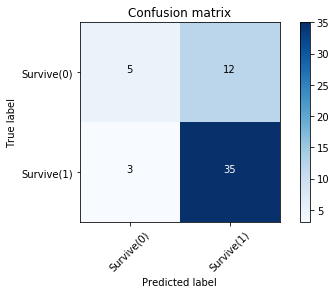

In [ ]:
cm = confusion_matrix(ytest, yhat)
np.set_printoptions(precision=2)

print (classification_report(ytest, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Survive(0)','Survive(1)'],normalize= False,  title='Confusion matrix')